# Data Science and Visualization (RUC F2024)

## Miniproject Report

## Project Title: Predicting Loan Approval

## Group Members:
[Thomas_Axel_Paszkowski_Martyna, 74598, 2024, tapm@ruc.dk]


## Abstract
This project explores the use of Machine learning models to predict the outcome of a loan applications 
 based on economical and personal data. I used a dataset consisting of several features based on the applicant's financial background and loan details. I applied both Decision tree and Random forrest to analyze and predict loan approvals. My goal is to identify the most influencial factors, that influence lending decisions, and assess the accuracy of predictive models in financial risk management.

## 0. Setup and Data

In [234]:
# For handling path- and environmentoperations in the OS.
import os 

# For numerical analysis an working with arrays.
import numpy as np 

# For data handling and manipulation of DataFrame structures.
import pandas as pd 

# Imports decision tree classifier.
from sklearn.tree import DecisionTreeClassifier 

# Imports Random Forest classifier to improve model accuracy.
from sklearn.ensemble import RandomForestClassifier 

# To split data into training and test sets.
from sklearn.model_selection import train_test_split

# For evaluating model performance.
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix 

# Imports the StandardScaler for data scaling.
from sklearn.preprocessing import StandardScaler 

# Enables data visualization.
import seaborn as sns 

# Facilitates data visualization using Matplotlib.
import matplotlib.pyplot as plt 

# imports ConfusionMatrixDisplay for displaying confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn import metrics

## 1. Loading the Data

In [235]:
# Defines the path to the dataset.
file_path = r'C:\Users\Thoma\Desktop\DataVizualisation\data\loan_approval_dataset.csv'

# Reads the dataset as a DataFrame. 
data = pd.read_csv(file_path)

### Data description:

This project uses a dataset that contains a history of loan approvals, that are used to determine if a loan should be approved og rejected. I will shortly give a description of the variables in this dataset:

#### 1. loan_id:
A unique identification number for each loan application. 
#### 2. no_of_dependents: 
Provides the number of individuals who are financially dependent on the applicant. 
#### 3. education:
Categorizes the applicant's highest level of education as'Graduate' or 'Not graduate'. 
#### 4. self_employed:
Indicates whether the applicant is self-employed.
#### 5. income_annum: 
applicant's annual income.
#### 6. loan_amount: 
The desired loan amount.
#### 7. loan_term:
The period over which the loan must be repaid, measured in years.
#### 8. cibil_score:
A numerical expression based on a level of a person's credit files to represent that person's creditworthiness. 
#### 9. residential_assets_value:
The total value of residential assets owned by the applicant.
#### 10. commercial_assets_value: 
The total value of commercial assets owned by the applicant. 
#### 11. luxury_assets_value:
The value of luxury assets, which can indicate the applicant's lifestyle and financial health.
#### 12. bank_asset_value:
The total value of assets the applicant has in the bank.
#### 13. loan_status:
The result of the loan application, categorized as 'Approved' or 'Rejected'.

#### Link to Dataset:
https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

In [236]:
# Shows the first five rows of the dataset.
data.head() 

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [237]:
# Provides details about culomn data types & not-null values.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## 2. Data Preprocessing

Here we ensure that the data fed into the machine learning models is clean, relevant, and appropriately formatted, to ensure accurate results.

In [238]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [239]:
# Removes whitespace in column names.
data.columns = data.columns.str.strip() 
#Show the updated column names.
data.columns 

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [240]:
 # Removes spaces in target column.
data['loan_status'] = data['loan_status'].str.strip()

# Converts 'Approved'/'Rejected' to binary values
data['loan_status'] = np.where(data['loan_status'] == 'Approved', 1, 0) 


In [241]:
# Initializes a scaling mechanism for numeric data.
scaler = StandardScaler() 
#  Fits the scaler to numeric data in the dataset and transforms it.
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# Converts the Scaled data back to a DataFrame with the original column names.
data_scaled = pd.DataFrame(data_scaled, columns=data.select_dtypes(include=[np.number]).columns)

In [242]:
# shows a summary of the DataFrame.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   int32 
dtypes: int32(1), int64(10), object(2)
memory usage: 417.0+ KB


In [243]:
data # shows the content of DataFrame.

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [244]:
# shows the unique values of 'loan_status' in the DataFrame 'data'.
data.loan_status.unique()

array([1, 0])

## 3. Exploratory Data Analysis

in this section we analyse the dataset, to uncover patterns, spot anomalies, idetify important variables, and test underlying assumptions. 

C:\Users\Thoma\AppData\Local\Temp\ipykernel_34244\3533789979.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['loan_status'] == 1]['cibil_score'], label='Approved', shade=True)
C:\Users\Thoma\AppData\Local\Temp\ipykernel_34244\3533789979.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['loan_status'] == 0]['cibil_score'], label='Rejected', shade=True)


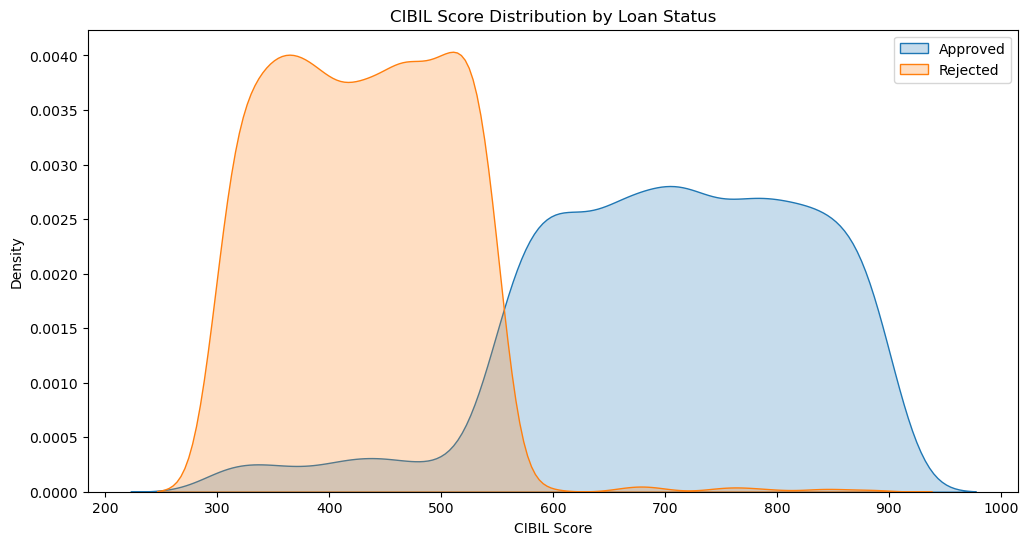

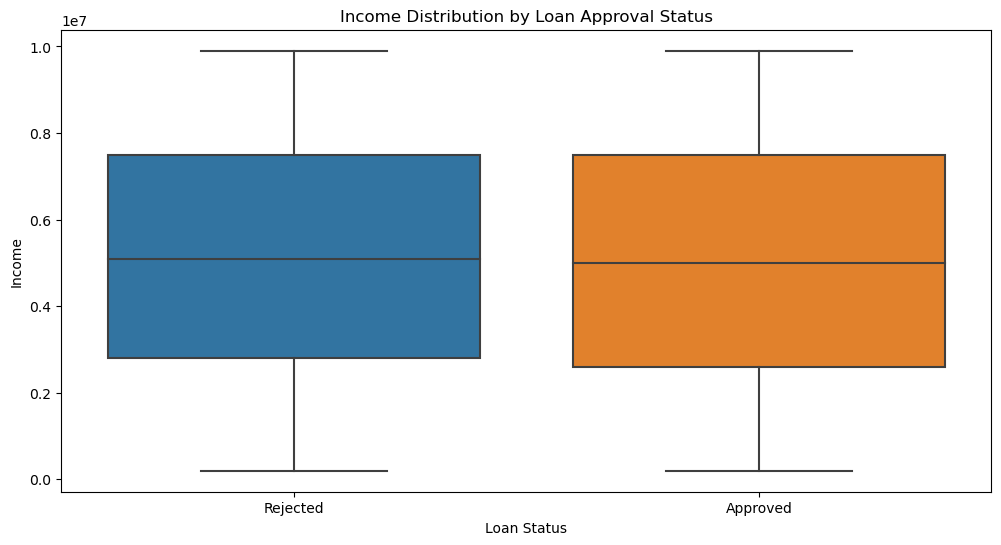

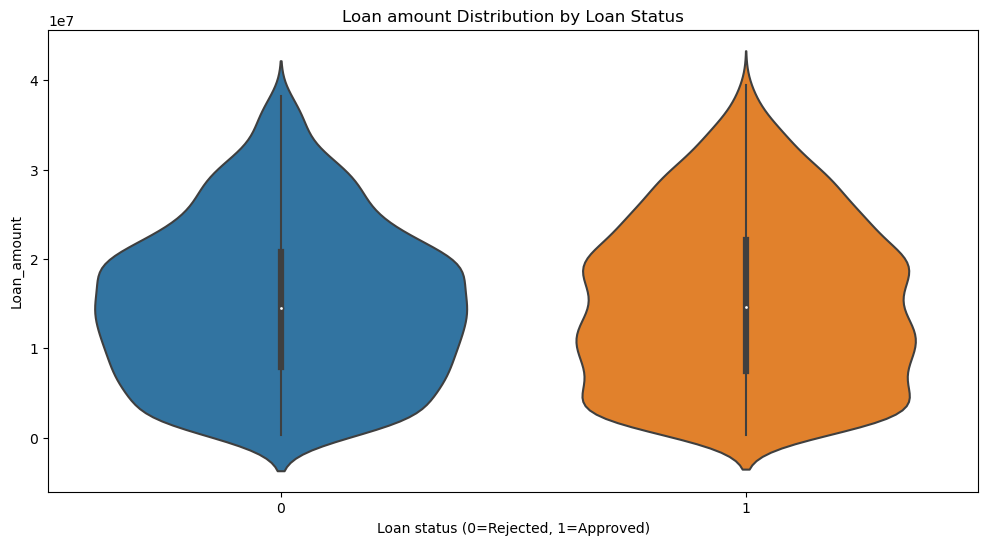

In [246]:
# CIBIL Score Distribution by Loan Status

# Set the size of the plot
plt.figure(figsize=(12, 6))

 # Plot density of approved loans
sns.kdeplot(data[data['loan_status'] == 1]['cibil_score'], label='Approved', shade=True)
# Plot density of rejected loans
sns.kdeplot(data[data['loan_status'] == 0]['cibil_score'], label='Rejected', shade=True)
# set the plot title.
plt.title('CIBIL Score Distribution by Loan Status')
# Label the x-axis.
plt.xlabel('CIBIL Score')
# label the y-axis.
plt.ylabel('Density')
plt.legend() # Display the legend.
plt.show()

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='income_annum', data=data)
plt.title('Income Distribution by Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Approved'])
plt.show()

# Loan amount Distribution by Loan Status
plt.figure(figsize=(12, 6))
sns.violinplot(x='loan_status', y='loan_amount', data=data)
plt.title('Loan amount Distribution by Loan Status')
plt.xlabel('Loan status (0=Rejected, 1=Approved)')
plt.ylabel('Loan_amount')
plt.show()




## 4. Data Modelling

In this section i apply machine learning techniques to predict loan approval outcomes based on the attributes from the dataset. The focus is on classification models, because i think its well suited for decision making where the outcome either is approved or rejected.

### 4.1. Feature Selection

In [247]:
# Defines a list of features, to use in the model.
feature_columns = ['income_annum', 'cibil_score', 'loan_amount'] 
# Selects the specified features for training the model. 
X = data[feature_columns] 
# Selects the target variable for training and testing. 
y = data['loan_status'] 
# Display the selected features.
feature_columns

['income_annum', 'cibil_score', 'loan_amount']

In [248]:
# Split the features and the target variable into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [249]:
# Displays the first rows of the training set for the features.
X_train.head()

,income_annum,cibil_score,loan_amount
1398,9400000,891,36800000
1519,7900000,497,21500000
4192,3200000,670,8100000
434,8800000,699,18100000
925,3000000,333,8000000


In [250]:
# Displays the first rows of the training set for the target variable.
y_train.head()

1398    1
1519    0
4192    1
434     1
925     0
Name: loan_status, dtype: int32

In [251]:
# Displays the first rows of the test set for the functions.
X_test.head()

,income_annum,cibil_score,loan_amount
2740,9400000,383,37300000
1123,9100000,458,18300000
3626,6900000,360,18500000
1808,7800000,763,22200000
1143,200000,569,400000


In [252]:
# Displays the first rows of the test set for the target variable.
y_test.head()

2740    0
1123    0
3626    0
1808    1
1143    1
Name: loan_status, dtype: int32

### 4.2 Model Construction and Validation

In [253]:
def plot_feature_importances(model, features):
    # Count amount of features
    n_features = len(features)
    #creates a horizontal bar chart.
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    #
    plt.yticks(np.arange(n_features), features)
    
    plt.xlabel("Feature importance")
    
    plt.ylabel("Feature")
    
    plt.ylim(-1, n_features)

In [254]:
# Initializes a decision tree classifier.
dtree = DecisionTreeClassifier()

In [255]:
# Trains the decision tree classifier with the training data
dtree = dtree.fit(X_train, y_train)

In [256]:
# Predicts the loan status of the test set (X_test) using the trained decision tree classifier (dtree).
y_pred = dtree.predict(X_test) 

In [257]:
# Displays the predicted loan statuses for the test set based on the trained decision tree classifer. 
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [258]:
# Returns the actual loan statuses from the test set as an array 
y_test.values

array([0, 0, 0, ..., 1, 1, 1])

In [259]:
# Calculates a confusion matrix based on the actual loan statuses from the test set and the predicted loan statuses. 
metrics.confusion_matrix(y_test.values, y_pred)

array([[436,  47],
       [ 55, 743]], dtype=int64)

In [260]:
# Defines a list of criteria for the tree decision model.
criteria = ['gini', 'entropy']
# Runs through each criterionin the list. 
for c in criteria:
    # Runs through every maximum depth from 2 to 8.
    for md in range(2, 8):
        
        # Initializes a decision tree model with the current criterion and the current maximum depth. 
        dtree = DecisionTreeClassifier(criterion=c, max_depth=md)
        
        # Trains the decision tree model with the training set. 
        dtree.fit(X_train, y_train)
        
       
        # Predicts the loan status of the test set. 
        y_pred = dtree.predict(X_test)
        # Prints the current criterion and the current maximum depth. 
        print("criterion={0}, max_depth={1}:\r".format(c, md))

        # Prints the accuracy of the current model based on the test set.
        print("Accuracy: {}\r\n".format(metrics.accuracy_score(y_test, y_pred)))

criterion=gini, max_depth=2:
Accuracy: 0.9492583918813428

criterion=gini, max_depth=3:
Accuracy: 0.9492583918813428

criterion=gini, max_depth=4:
Accuracy: 0.9492583918813428

criterion=gini, max_depth=5:
Accuracy: 0.9437939110070258

criterion=gini, max_depth=6:
Accuracy: 0.942232630757221

criterion=gini, max_depth=7:
Accuracy: 0.9375487900078064

criterion=entropy, max_depth=2:
Accuracy: 0.9492583918813428

criterion=entropy, max_depth=3:
Accuracy: 0.9492583918813428

criterion=entropy, max_depth=4:
Accuracy: 0.9469164715066355

criterion=entropy, max_depth=5:
Accuracy: 0.9469164715066355

criterion=entropy, max_depth=6:
Accuracy: 0.9430132708821234

criterion=entropy, max_depth=7:
Accuracy: 0.9437939110070258



In [261]:
# Tjek fordelingen af klasser i både trænings- og testsættet
print(y_train.value_counts())
print(y_test.value_counts())


loan_status
1    1858
0    1130
Name: count, dtype: int64
loan_status
1    798
0    483
Name: count, dtype: int64


### 4.3 Model Application and Performance Evaluation



In [262]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9437939110070258


In [263]:
print("Recall:", metrics.recall_score(y_test, y_pred))

Recall: 0.9210526315789473


In [264]:
print("Precision", metrics.precision_score(y_test, y_pred) )

Precision 0.9879032258064516


<function matplotlib.pyplot.show(close=None, block=None)>

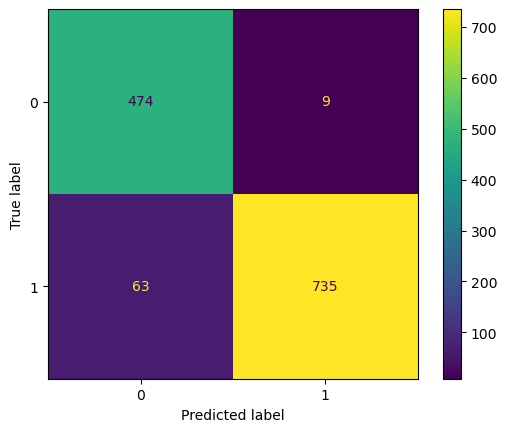

In [265]:
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

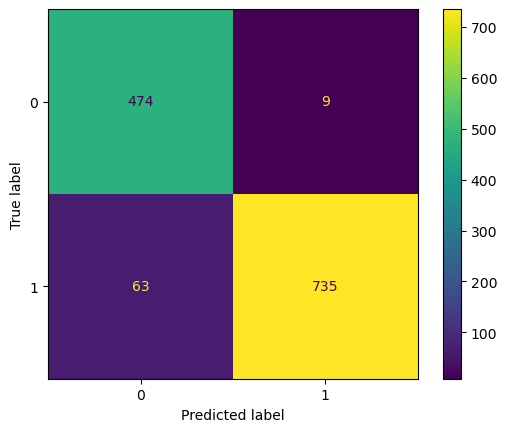

In [266]:
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test)
plt.show

Random Forest Accuracy: 0.9453551912568307
Random Forest Recall: 0.9260651629072681
Random Forest Precision: 0.9853333333333333


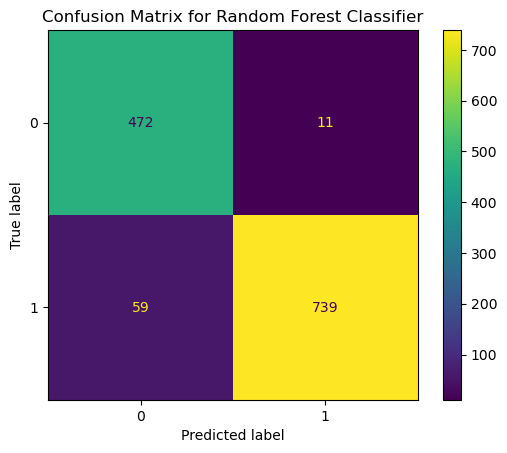

In [267]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


### 4.4 Visualize and Analyze Your Results/Findings from Data Modelling



In [268]:
def plot_feature_importances(model, features):
    # Count amount of features.
    n_features = len(features)
    #Creates a horizontal bar chart.
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    # This line sets the labels on the y-axis to show the names of the features next to each bar in the chart.
    plt.yticks(np.arange(n_features), features)
    #Label for x-axis.
    plt.xlabel("Feature importance")
    #Label for y-axis.
    plt.ylabel("Feature")
    # This line sets the limits of the y-axis in the plot to go from -1 to the number of moves, ensuring that all bars are fully visible.
    plt.ylim(-1, n_features)

In [269]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees in the forest

# Train the model
rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf.predict(X_test)


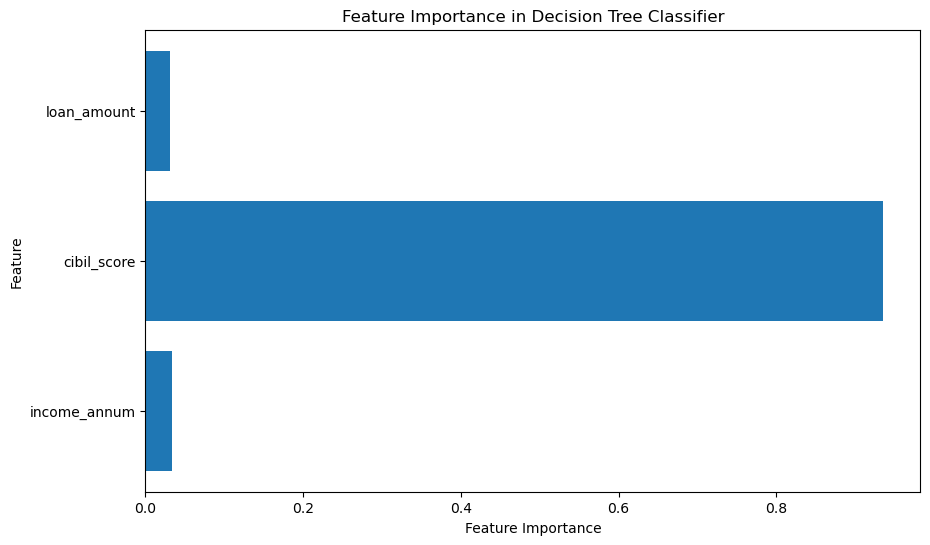

In [270]:
# Defines a function to display a bar graph that illustrates the importance of various features in the model.
def plot_feature_importances(model, features):
    # Sets the size of the figure to 10 width and 6 height.
    plt.figure(figsize=(10, 6))
    # Calculates the number of moves.
    n_features = len(features)
    # Creates a horizontal bar chart where the height of the bars represents the importance of each feature.
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # Puts markers on the y-axis to show the feature names.
    plt.yticks(np.arange(n_features), features)
    # Adds a label to the x-axis.
    plt.xlabel('Feature Importance')
    # Adds a label to the y-axis.
    plt.ylabel('Feature')
    # adds a title for the plot.
    plt.title('Feature Importance in Decision Tree Classifier')
    # Show the plot.
    plt.show()
# Shows feature importance for Decision Tree.
plot_feature_importances(dtree, feature_columns) 


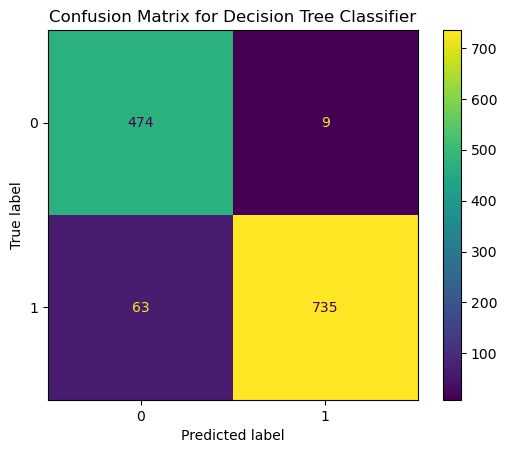

In [271]:
# Generate sa confussion matrix for 'dtree' based on the test data.
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test)
# Create title.
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

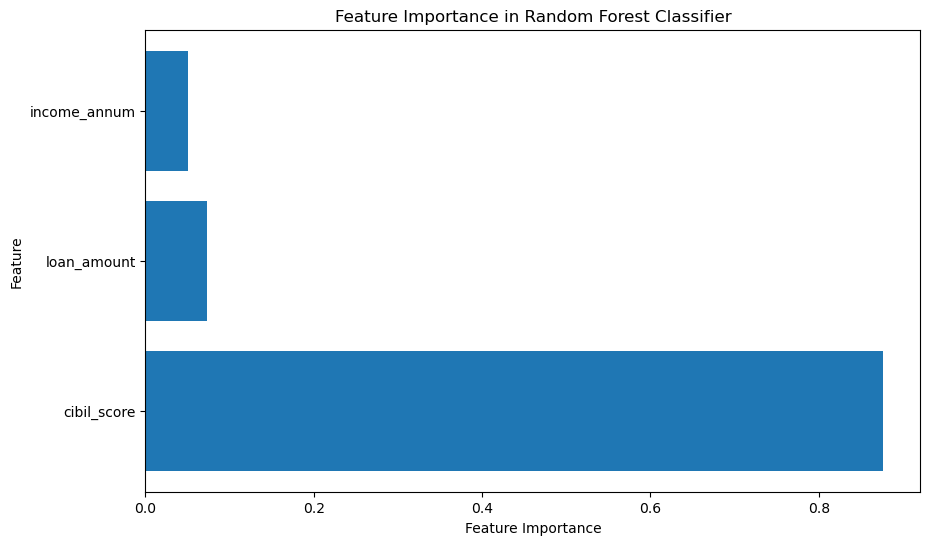

In [272]:
 # Defines a function to visualize the importance of the move in a horizontal bar chart.
def plot_rf_feature_importances(model, features):
    # Sets the size of the figure.
    plt.figure(figsize=(10, 6))
# Gets an array of feature importance from the model.
    importances = model.feature_importances_
    # Sorts the indices for importance in descending order.
    indices = np.argsort(importances)[::-1]
    # Draws a horizontal bar chart with the draw's importance.
    plt.barh(range(len(indices)), importances[indices], align='center')
    # Puts the feature names on the y-axis based on their sorted importance.
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    # Adds label to the x-axis.
    plt.xlabel('Feature Importance')
    # Adds label to the y-axis.
    plt.ylabel('Feature')
     # Specifies a title for the plot.
    plt.title('Feature Importance in Random Forest Classifier')
    plt.show()

plot_rf_feature_importances(rf, feature_columns) # Shows feature importance for Random Forest.

## 5. Conclusion and Discussion

This project uses machine learning to find out what affects loan approval decisions by analyzing applicants' financial and personal data. We focused on CIBIL scores, annual income, and loan amounts. Our findings showed that a good CIBIL score, which reflects a person's credit history, is the most important factor in getting a loan approved. Among the models we used, Random Forests performed better than Decision Trees because they are more accurate.

The use of these models proves that machine learning can help in assessing financial risks and suggests ways to improve future analyses. Looking ahead, we could add new features to our models or try different ways to vizualise our results to make them clearer and more useful. To enchance further i could, explore additional machine learning techniques, such as unsupervised learning for clustering or anomaly detection. 